# Model used Celltypist_Nuclei_Lung_Airway.pkl-done

In [1]:
import os
root_dir = "/dss/dsshome1/02/di93zoj/shahana"
import anndata
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import scanpy as sc
import h5py

In [2]:
!python -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: cudf 23.2.0 has a non-standard dependency specifier cuda-python>=12.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cudf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pylibraft 23.2.0 has a non-standard dependency specifier cuda-python>=12.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pylibraft or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version

In [3]:
!pip install celltypist

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: cudf 23.2.0 has a non-standard dependency specifier cuda-python>=12.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cudf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pylibraft 23.2.0 has a non-standard dependency specifier cuda-python>=12.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pylibraft or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version

In [5]:
import celltypist
from celltypist import models

Assign cell type labels using a CellTypist built-in model

In [6]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 44
📂 Storing models in /dss/dsshome1/02/di93zoj/.celltypist/data/models
💾 Downloading model [1/44]: Immune_All_Low.pkl
💾 Downloading model [2/44]: Immune_All_High.pkl
💾 Downloading model [3/44]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [4/44]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [5/44]: Adult_Human_Skin.pkl
💾 Downloading model [6/44]: Adult_Mouse_Gut.pkl
💾 Downloading model [7/44]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [8/44]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [9/44]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [10/44]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [11/44]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [12/44]: COVID19_Immune_Landscape.pkl
💾 Downloading model [13/44]: Cells_Fetal_Lung.pkl
💾 Downloading model [14/44]: Cells_Intestinal_Tract.pkl
💾 Downloading model [15/44]: Cells_Lu

In [7]:
models.models_path

'/dss/dsshome1/02/di93zoj/.celltypist/data/models'

In [8]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
3,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
4,Adult_Human_Skin.pkl,cell types from human healthy adult skin
5,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
6,Adult_Mouse_OlfactoryBulb.pkl,cell types from the olfactory bulb of adult mice
7,Adult_Pig_Hippocampus.pkl,cell types from the adult pig hippocampus
8,Adult_RhesusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult rhesu...
9,Autopsy_COVID19_Lung.pkl,cell types from the lungs of 16 SARS-CoV-2 inf...


In [9]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Nuclei_Lung_Airway.pkl')

Show model meta information

In [10]:
model

CellTypist model with 78 cell types and 5883 features
    date: 2022-09-27 01:30:38.635174
    details: cell populations from snRNA-seq of five locations of the human lungs and airways
    source: https://doi.org/10.1101/2021.11.26.470108
    version: v4
    cell types: AT1 , AT2, ..., gdT
    features: SAMD11, HES4, ..., MT-CYB

In [11]:
model.cell_types

array(['AT1 ', 'AT2', 'B_memory', 'B_naive', 'B_plasma_IgA',
       'B_plasma_IgG', 'B_plasmablast', 'Basal', 'CD4_EM/Effector',
       'CD4_TRM', 'CD4_naive/CM', 'CD8_EM', 'CD8_EM/EMRA', 'CD8_TRM',
       'CD8_TRM/EM', 'Chondrocyte', 'Ciliated', 'DC_1', 'DC_2',
       'DC_activated', 'DC_plasmacytoid', 'Deuterosomal', 'Dividing_AT2',
       'Dividing_Basal', 'Endothelia_Lymphatic',
       'Endothelia_vascular_Cap_a', 'Endothelia_vascular_Cap_g',
       'Endothelia_vascular_arterial_pulmonary',
       'Endothelia_vascular_arterial_systemic',
       'Endothelia_vascular_venous_pulmonary',
       'Endothelia_vascular_venous_systemic', 'Fibro_adventitial',
       'Fibro_alveolar', 'Fibro_myofibroblast', 'Fibro_peribronchial',
       'Fibro_perichondrial', 'ILC', 'Ionocyte_n_Brush', 'MAIT',
       'Macro_AW_CX3CR1', 'Macro_CCL', 'Macro_CHIT1', 'Macro_alveolar',
       'Macro_alveolar_metallothioneins', 'Macro_dividing',
       'Macro_intermediate', 'Macro_interstitial', 'Macro_intravascula

In [12]:
adata_covid = sc.read('/dss/dsshome1/02/di93zoj/2301_annot_patient_integrated.h5ad')

In [13]:
adata_covid

AnnData object with n_obs × n_vars = 254630 × 18115
    obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'leiden_coarse', 'leiden_fine', 'leiden_subset', 'celltype_fine', 'celltype_approx'
    var: 'used_for_scvi'
    uns: '_scvi', 'celltype_approx_colors', 'celltype_coarse_colors', 'celltype_fine_colors', 'dendrogram_leiden_fine', 'hvg', 'infected_colors', 'leiden', 'leiden_coarse_colors', 'leiden_colors', 'leiden_fine_colors', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [14]:
# Not run; predict cell identities using this loaded model.
#predictions = celltypist.annotate(adata_2000, model = model, majority_voting = True)
# Alternatively, just specify the model name (recommended as this ensures the model is intact every time it is loaded).
predictions = celltypist.annotate(adata_covid, model = 'Nuclei_Lung_Airway.pkl', majority_voting = True)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 254630 cells and 18115 genes
🔗 Matching reference genes in the model
🧬 5427 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


In [ ]:
# What is this warning at the beginning of the prediction analysis "invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate". do I need to modify/more preprocess the covid data?? the 

In [15]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
muc21058_AAACCCAAGTTTGAGA,SMG_Duct,18,SMG_Duct
muc21058_AAACCCACACGCGCAT,SMG_Duct,54,SMG_Duct
muc21058_AAACCCACAGACACAG,SMG_Duct,84,SMG_Duct
muc21058_AAACCCAGTATTGCCA,SMG_Duct,27,SMG_Duct
muc21058_AAACCCAGTCGTATTG,SMG_Duct,18,SMG_Duct
...,...,...,...
muc22968_TTTGTTGCATCACCAA,SMG_Duct,282,SMG_Duct
muc22968_TTTGTTGGTTCCGTTC,Suprabasal,332,SMG_Duct
muc22968_TTTGTTGTCCACACCT,CD4_EM/Effector,346,CD4_EM/Effector
muc22968_TTTGTTGTCTAACGGT,Dividing_Basal,89,Dividing_Basal


In [16]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata = predictions.to_adata()

In [17]:
adata.obs

,identifier,patient,name,barcode_round,sample,viral_counts,treatment,treatment_virus,infected,n_counts,...,_scvi_labels,leiden_coarse,leiden_fine,leiden_subset,celltype_fine,celltype_approx,predicted_labels,over_clustering,majority_voting,conf_score
muc21058_AAACCCAAGTTTGAGA,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,TNFa_IFNg,TNFa_IFNg + sars-cov-2,True,9775.0,...,0,3,"13,1","13,1",sub5/club,"13,1/club",SMG_Duct,18,SMG_Duct,0.950120
muc21058_AAACCCACACGCGCAT,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNa (b_d),IFNa (b_d),False,12826.0,...,0,4,"14,0","14,0",sub3/club,"14,0/club",SMG_Duct,54,SMG_Duct,0.984571
muc21058_AAACCCACAGACACAG,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNg,IFNg,False,15557.0,...,0,6,10,10,10/suprabasal,10/suprabasal,SMG_Duct,84,SMG_Duct,0.473296
muc21058_AAACCCAGTATTGCCA,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNa (b_d),IFNa (b_d) + sars-cov-2,True,15520.0,...,0,4,"14,0","14,0",sub3/club,"14,0/club",SMG_Duct,27,SMG_Duct,0.935236
muc21058_AAACCCAGTCGTATTG,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,Tirapazamine,Tirapazamine + sars-cov-2,True,13483.0,...,0,4,"14,1","14,1",sub3/club,"14,1/club",SMG_Duct,18,SMG_Duct,0.625798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
muc22968_TTTGTTGCATCACCAA,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,Sorafenib,Sorafenib + sars-cov-2,True,13844.0,...,0,6,15,15,15/suprabasal,15/suprabasal,SMG_Duct,282,SMG_Duct,0.201478
muc22968_TTTGTTGGTTCCGTTC,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,TGFb2,TGFb2 + sars-cov-2,True,2846.0,...,0,6,2,2,2/suprabasal,2/suprabasal,Suprabasal,332,SMG_Duct,0.259150
muc22968_TTTGTTGTCCACACCT,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,DMSO,DMSO + sars-cov-2,True,10235.0,...,0,6,2,2,2/suprabasal,2/suprabasal,CD4_EM/Effector,346,CD4_EM/Effector,0.179542
muc22968_TTTGTTGTCTAACGGT,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,Sorafenib,Sorafenib + sars-cov-2,True,11320.0,...,0,13,16,16,16/basal prolif.,16/suprabasal,Dividing_Basal,89,Dividing_Basal,0.283465


In [18]:
adata.obs.cell_type

muc21058_AAACCCAAGTTTGAGA             club
muc21058_AAACCCACACGCGCAT             club
muc21058_AAACCCACAGACACAG       suprabasal
muc21058_AAACCCAGTATTGCCA             club
muc21058_AAACCCAGTCGTATTG             club
                                 ...      
muc22968_TTTGTTGCATCACCAA       suprabasal
muc22968_TTTGTTGGTTCCGTTC       suprabasal
muc22968_TTTGTTGTCCACACCT       suprabasal
muc22968_TTTGTTGTCTAACGGT    basal prolif.
muc22968_TTTGTTGTCTTGGAAC            basal
Name: cell_type, Length: 254630, dtype: category
Categories (13, object): ['?', 'PNEC', 'basal', 'basal prolif.', ..., 'ionocytes', 'suprabasal', 'tuft', 'viral']

In [19]:
# If the UMAP or any cell embeddings are already available in the `AnnData`, skip this command.
sc.tl.umap(adata)

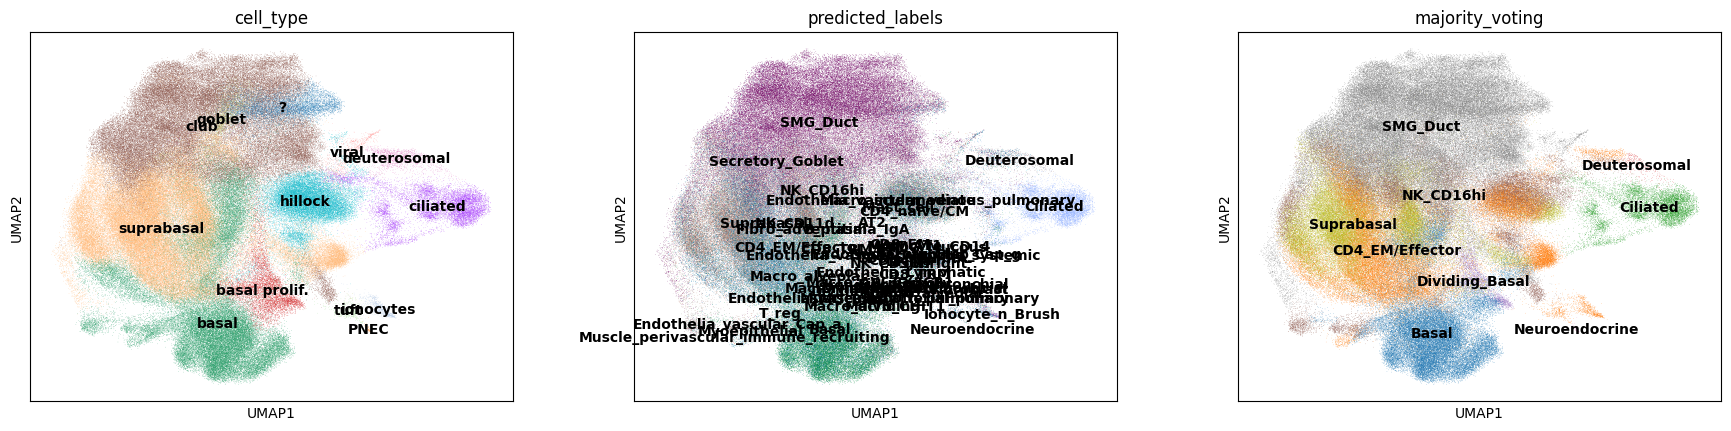

In [20]:
sc.pl.umap(adata, color = ['cell_type', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')

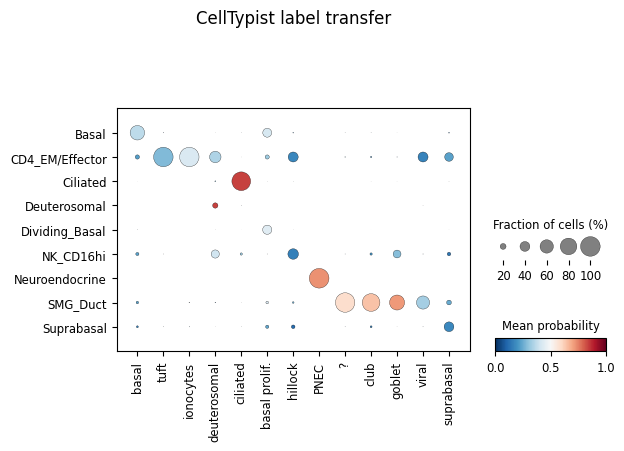

In [21]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting')

In [26]:
#mkdir celltypist_covid

mkdir: cannot create directory ‘celltypist_covid’: File exists


In [22]:
top_3_genes = model.extract_top_markers("Ciliated", 3)
top_3_genes

array(['TSPAN19', 'TMEM212', 'HHLA2'], dtype=object)

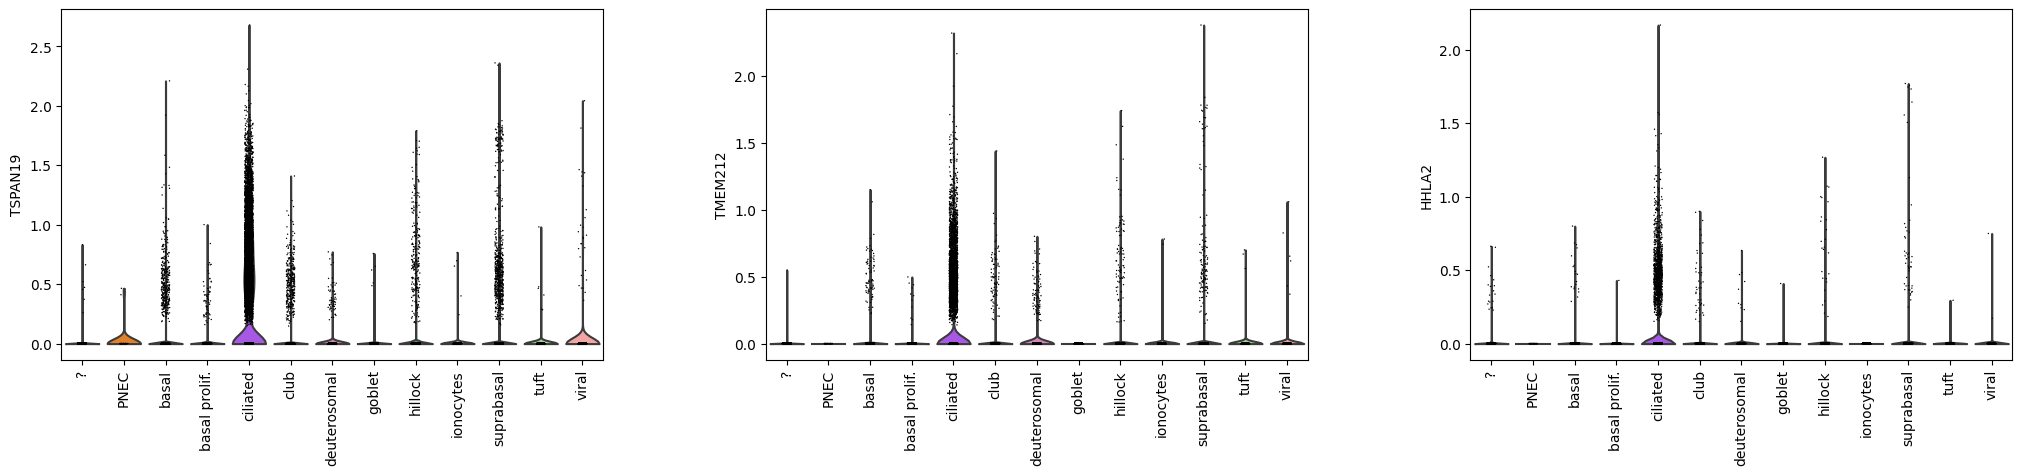

In [23]:
# Check expression of the three genes in the training set.
sc.pl.violin(adata_covid, top_3_genes, groupby = 'cell_type', rotation = 90)

In [24]:
adata_covid.obs

,identifier,patient,name,barcode_round,sample,viral_counts,treatment,treatment_virus,infected,n_counts,...,_scvi_labels,leiden_coarse,leiden_fine,leiden_subset,celltype_fine,celltype_approx,predicted_labels,over_clustering,majority_voting,conf_score
muc21058_AAACCCAAGTTTGAGA,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,TNFa_IFNg,TNFa_IFNg + sars-cov-2,True,9775.0,...,0,3,"13,1","13,1",sub5/club,"13,1/club",SMG_Duct,18,SMG_Duct,0.950120
muc21058_AAACCCACACGCGCAT,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNa (b_d),IFNa (b_d),False,12826.0,...,0,4,"14,0","14,0",sub3/club,"14,0/club",SMG_Duct,54,SMG_Duct,0.984571
muc21058_AAACCCACAGACACAG,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNg,IFNg,False,15557.0,...,0,6,10,10,10/suprabasal,10/suprabasal,SMG_Duct,84,SMG_Duct,0.473296
muc21058_AAACCCAGTATTGCCA,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,IFNa (b_d),IFNa (b_d) + sars-cov-2,True,15520.0,...,0,4,"14,0","14,0",sub3/club,"14,0/club",SMG_Duct,27,SMG_Duct,0.935236
muc21058_AAACCCAGTCGTATTG,muc21058,patient_1,ALI_1_Barcode_1,ALI_1,3,0.0,Tirapazamine,Tirapazamine + sars-cov-2,True,13483.0,...,0,4,"14,1","14,1",sub3/club,"14,1/club",SMG_Duct,18,SMG_Duct,0.625798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
muc22968_TTTGTTGCATCACCAA,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,Sorafenib,Sorafenib + sars-cov-2,True,13844.0,...,0,6,15,15,15/suprabasal,15/suprabasal,SMG_Duct,282,SMG_Duct,0.201478
muc22968_TTTGTTGGTTCCGTTC,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,TGFb2,TGFb2 + sars-cov-2,True,2846.0,...,0,6,2,2,2/suprabasal,2/suprabasal,Suprabasal,332,SMG_Duct,0.259150
muc22968_TTTGTTGTCCACACCT,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,DMSO,DMSO + sars-cov-2,True,10235.0,...,0,6,2,2,2/suprabasal,2/suprabasal,CD4_EM/Effector,346,CD4_EM/Effector,0.179542
muc22968_TTTGTTGTCTAACGGT,muc22968,patient_4,ALI_3_Barcode_4,ALI_3,11,0.0,Sorafenib,Sorafenib + sars-cov-2,True,11320.0,...,0,13,16,16,16/basal prolif.,16/suprabasal,Dividing_Basal,89,Dividing_Basal,0.283465


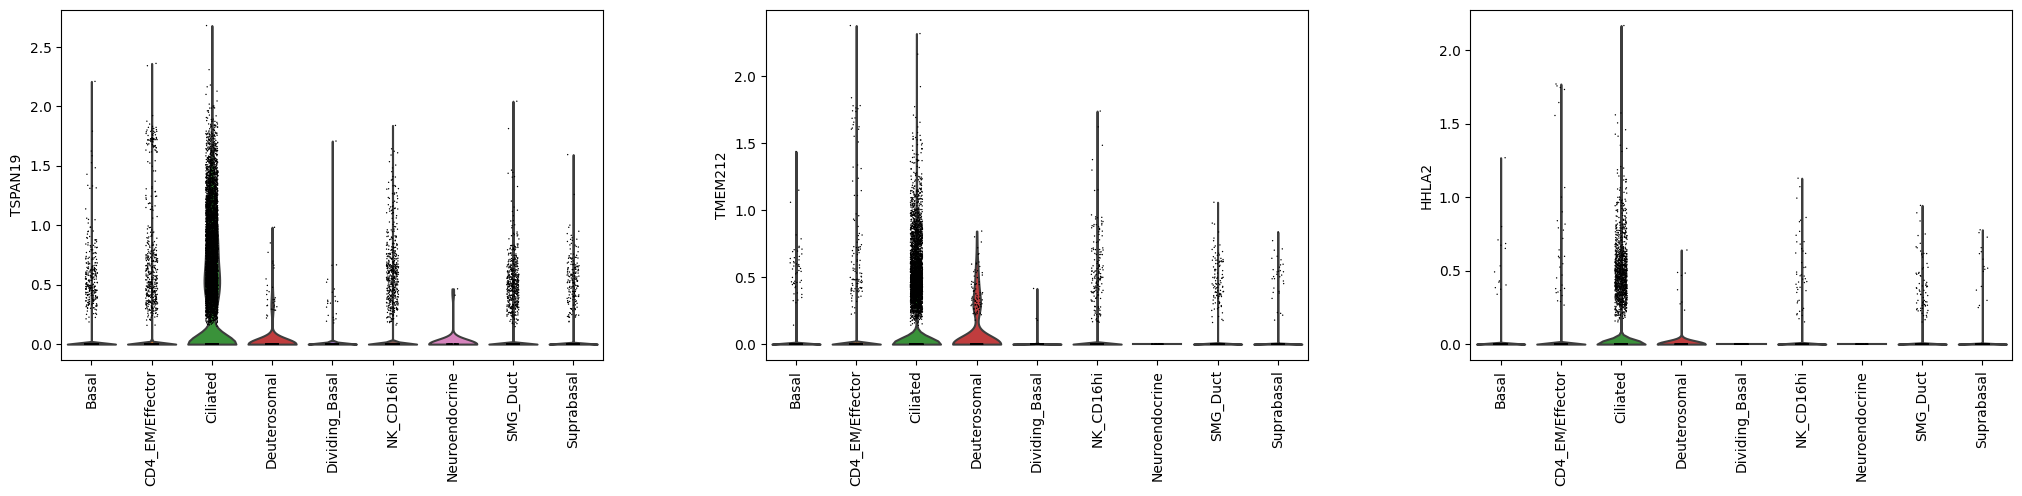

In [25]:
# Check expression of the three genes in the query set.
# Here we use `majority_voting` from CellTypist as the cell type labels for this dataset.
sc.pl.violin(adata_covid, top_3_genes, groupby = 'majority_voting', rotation = 90)